In [1]:
import numpy as np
import csv

In [2]:
profiling_output_path = '../data/profiling_output/children/linguistic_profile.csv'

In [3]:
def load_dataset(src_path):
    features_names = None # conterrà i nomi delle feature
    documents_info = [] # è un vettore che consiste nella prima colonna del file csv: children/training#66#children#F.conllu di tutti i doc
    features = []

    # row[0] è ['Filename', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'ttr_lemma_chunks_100', 'ttr_lemma_chunks_200', 'ttr_form_chunks_100', ...
    # row[1] è ['children/training#66#children#F.conllu', '21', '396', '18.857142857142858', '4.227528089887641', '0.68', ...
    # row[2] è ['children/test#133#children#unknown.conllu', '13', '328', '25.23076923076923', '3.99672131147541', '0.52', ...
    # etc ...
    
    with open(src_path, 'r') as src_file:
        csv_reader = csv.reader(src_file, delimiter='\t')
        for row in csv_reader:
            if features_names is None: # la prima riga del csv contiene 'Filename' e tutti i nomi delle features (la prima volta che entro nel ciclo ho feature_name ancora inizializzato a None, e quindi uso questa condizione per iniziare a popolare l'array
                features_names = row[1:] # estraggo le feature, ovvero salto la prima colonna dove è contenuto il nome del file
            else:
                documents_info.append(row[0]) # il primo elemento di ogni riga contiene il nome del file children/training#66#children#F.conllu dove sono codificati il genere, lo split e i velori numerici delle feature
                features.append([float(el) for el in row[1:]]) # dal secondo elemento in poi ci sono i nomi delle feature perché il primo è il nome del file
    return features_names, documents_info, features    

In [4]:
features_names, documents_info, features = load_dataset(profiling_output_path)
# features_name è la prima riga del file csv (quella con i nomi delle features)
# documents_info è l'elenco dei nomi dei file con l'#.conllu
# features sono i veri valori di TUTTE le feature (di tutti i documenti)

In [5]:
print("Numero features: " + str(len(features_names)))
print('\nLista prime dieci features:')
print(features_names[:10])

Numero features: 140

Lista prime dieci features:
['n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'ttr_lemma_chunks_100', 'ttr_lemma_chunks_200', 'ttr_form_chunks_100', 'ttr_form_chunks_200', 'upos_dist_ADJ', 'upos_dist_ADP']


In [6]:
print('Primo documento:')
print(f'Document info: {documents_info[0]}')
print('Secondo documento:')
print(f'Document info: {documents_info[1]}')
print('Nono documento:')
print(f'Document info: {documents_info[9]}')
print('\n')
# print("Features names: " + str(features_names[:10]))
print(f'Features: {features[0][:10]}')

Primo documento:
Document info: children/training#66#children#F.conllu
Secondo documento:
Document info: children/test#133#children#unknown.conllu
Nono documento:
Document info: children/test#140#children#unknown.conllu


Features: [21.0, 396.0, 18.857142857142858, 4.227528089887641, 0.68, 0.565, 0.8, 0.685, 4.292929292929293, 9.090909090909092]


In [7]:
# Estraggo lo spit (training/test), l'ID del testo (66), il genre (children) e il genere (F/M)

document_info = documents_info[0] # consideriamo il primo documento profiling_input/training#859#SPORTS#20-29#M.conllu

print('Document info:', document_info)

document_info = document_info.split('/')[1]
print('Document info senza cartella:', document_info)

document_info = document_info.split('.')[0]
print('Document info senza estensione:', document_info)

splitted_document_info = document_info.split('#')
print('Split su #:', splitted_document_info)

label = splitted_document_info[2]
print('Label:', label)

Document info: children/training#66#children#F.conllu
Document info senza cartella: training#66#children#F.conllu
Document info senza estensione: training#66#children#F
Split su #: ['training', '66', 'children', 'F']
Label: children


In [8]:
#per capire la cella dopo
'''
for doc_info in documents_info:
    doc_info = doc_info.split('/')[1]
    # doc_info = training#66#children#F.conllu
    doc_info = doc_info[0:-len('.conllu')]
    # doc_info = training#66#children#F
    splitted_doc_info = doc_info.split('#')
    # splitted_doc_info = ['training', '66', 'children', 'F']
    genre = splitted_doc_info[2]
    # genre = children
    gender = splitted_doc_info[3]
    # gender = F
'''

"\nfor doc_info in documents_info:\n    doc_info = doc_info.split('/')[1]\n    # doc_info = training#66#children#F.conllu\n    doc_info = doc_info[0:-len('.conllu')]\n    # doc_info = training#66#children#F\n    splitted_doc_info = doc_info.split('#')\n    # splitted_doc_info = ['training', '66', 'children', 'F']\n    genre = splitted_doc_info[2]\n    # genre = children\n    gender = splitted_doc_info[3]\n    # gender = F\n"

In [9]:
def create_label_list(documents_info):
    labels = []
    
    for doc_info in documents_info:
        doc_info = doc_info.split('/')[1]
        # doc_info = training#66#children#F.conllu
        doc_info = doc_info[0:-len('.conllu')]
        # doc_info = training#66#children#F
        splitted_doc_info = doc_info.split('#')
        # splitted_doc_info = ['training', '66', 'children', 'F']
        genre = splitted_doc_info[2]
        # genre = children
        gender = splitted_doc_info[3]
        # gender = F
        
        labels.append(gender)
    return labels

In [10]:
labels = create_label_list(documents_info)

In [11]:
labels[:10]

['F', 'unknown', 'M', 'F', 'unknown', 'unknown', 'F', 'F', 'M', 'unknown']

## Divisione tra training e test set

In [12]:
def train_test_split(documents_info, features, labels):
    train_features = []
    test_features = []
    train_labels = []
    test_labels = []

    for idx in range(len(documents_info)):  # Iteriamo sugli indici invece che su zip() come faceva Luca
    #for doc_info, doc_features, doc_label in zip(documents_info, features, labels): #Altra versione for idx in range(len(documents_info))

        doc_info = documents_info[idx]
        doc_features = features[idx]
        doc_label = labels[idx]
    
        if 'training' in doc_info:
            train_features.append(doc_features)                # train_features.append(documents_info[idx])
            train_labels.append(doc_label)
        else: # if 'test' in file_name
            test_features.append(doc_features)
            test_labels.append(doc_label)
            
    return train_features, train_labels, test_features, test_labels

In [13]:
train_features, train_labels, test_features, test_labels = train_test_split(documents_info, features, labels)

print('Documenti training set:', len(train_features), len(train_labels))
print('Documenti test set:', len(test_features), len(test_labels))

Documenti training set: 200 200
Documenti test set: 200 200


## Normalizzazione

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_features)

In [16]:
X_train

array([[0.26388889, 0.28271028, 0.15291937, ..., 0.19607843, 0.        ,
        0.        ],
       [0.25      , 0.34034268, 0.20312017, ..., 0.23809524, 0.21428571,
        0.        ],
       [0.63888889, 0.44626168, 0.08553445, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13888889, 0.14252336, 0.14365153, ..., 0.        , 0.        ,
        0.        ],
       [0.13888889, 0.31853583, 0.34728658, ..., 0.28985507, 0.        ,
        0.        ],
       [0.05555556, 0.15264798, 0.36170322, ..., 0.        , 0.        ,
        0.        ]], shape=(200, 140))

## Classificazione

In [17]:
from sklearn.svm import LinearSVC

In [18]:
svc = LinearSVC(dual=False)
svc.fit(X_train, train_labels) #sarebbe come fare svc.fit(X_train, Y_train)

LinearSVC(dual=False)

## Test del modello

In [19]:
X_test = scaler.transform(test_features)

In [20]:
test_predictions = svc.predict(X_test)

In [21]:
test_predictions[:12]

array(['F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M'],
      dtype='<U1')

In [22]:
X_test #ciascuna riga è un post, ciascuna colonna contiene la percentuale di ciascuna categoria assegnabile al post (quanto è probabile che quel post sia di quella categoria)

array([[0.15277778, 0.22975078, 0.22183408, ..., 0.31746032, 0.        ,
        0.        ],
       [0.09722222, 0.17990654, 0.26619298, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.29283489, 0.17014211, ..., 0.12345679, 0.        ,
        0.        ],
       ...,
       [0.13888889, 0.16277259, 0.16707857, ..., 0.20833333, 0.        ,
        0.        ],
       [0.15277778, 0.15186916, 0.13866115, ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.22274143, 0.38017454, ..., 0.        , 0.375     ,
        0.625     ]], shape=(200, 140))

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [24]:
print(classification_report(test_labels, test_predictions, zero_division=0))#, output_dict=True))

              precision    recall  f1-score   support

           F       0.00      0.00      0.00       0.0
           M       0.00      0.00      0.00       0.0
     unknown       0.00      0.00      0.00     200.0

    accuracy                           0.00     200.0
   macro avg       0.00      0.00      0.00     200.0
weighted avg       0.00      0.00      0.00     200.0



In [25]:
print(confusion_matrix(test_labels, test_predictions))

[[  0   0   0]
 [  0   0   0]
 [127  73   0]]


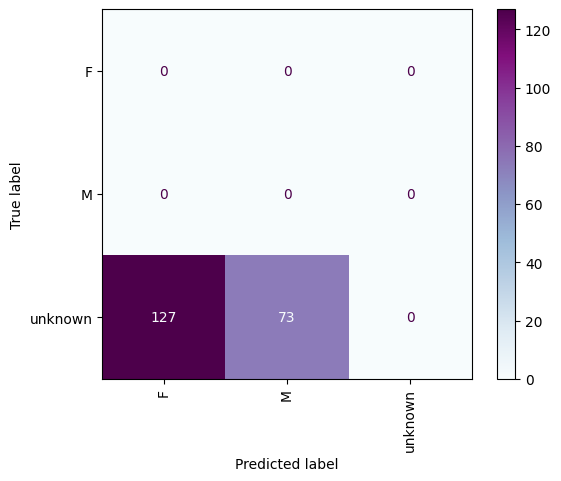

In [27]:
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, xticks_rotation='vertical', cmap='BuPu');
# Nella diagonale ci sono le classi classificate correttamente